# Résumé des Étapes du Projet

1. **Chargement des Données** :
   - Les données sont importées depuis un fichier CSV dans un DataFrame pandas.
   

2. **Sélection des Colonnes Pertinentes** :
   - Parmi toutes les caractéristiques disponibles, seules les colonnes `Credit_History`, `Married`, et `ApplicantIncome` sont sélectionnées pour l'analyse.

3. **Division des Données en Ensembles d'Entraînement et de Test** :
   - Les données sont divisées en ensembles d'entraînement et de test en utilisant la méthode `StratifiedShuffleSplit`. Cette méthode assure que la distribution des classes est conservée dans les deux ensembles, garantissant ainsi une répartition équitable.

4. **Entraînement du Modèle de Régression Logistique** :
   - Un modèle de régression logistique est entraîné sur l'ensemble d'entraînement. Ce modèle est choisi pour sa simplicité et son efficacité dans les problèmes de classification binaire.

5. **Évaluation du Modèle** :
   - La performance du modèle est évaluée sur l'ensemble de test. 
6. **Sauvegarde du Modèle** :
   - Le modèle entraîné est sauvegardé dans un fichier à l'aide de la bibliothèque `pickle`. Cela permet de conserver le modèle pour un déploiement futur sans avoir à le réentraîner.

7. **Chargement du Modèle et Prédictions** :
   - Le modèle sauvegardé est chargé à partir du fichier et utilisé pour faire des prédictions sur de nouvelles données. Cette étape montre comment le modèle peut être déployé et utilisé dans des applications réelles.

### Conclusion

Ce projet illustre le processus complet de développement d'un modèle de classification en utilisant la régression logistique, depuis la préparation des données jusqu'à la sauvegarde et le déploiement du modèle. Les étapes clés incluent la sélection des caractéristiques, la division des données, l'entraînement et l'évaluation du modèle, ainsi que la gestion du modèle pour une utilisation future.


In [137]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pickle  # pour la sérialisation du modèle à utiliser avec Flask
from sklearn.preprocessing import LabelEncoder  # pour encoder les variables catégorielles en valeurs numériques

# Importation des modèles de machine learning
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score  # pour calculer la précision des prédictions
from sklearn.model_selection import StratifiedShuffleSplit  # pour la division stratifiée des données

# Préparation des données (Data Preparation)

In [138]:
df= pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [139]:
#voir les valeurs manquantes
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [141]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Gérer les valeurs manquantes 

In [142]:
#diviser la base de donnees

cat_data=[]
num_data=[]
for i , c in enumerate(df.dtypes):
    if  c == object :
        cat_data.append(df.iloc[:,i])#df.iloc[x : y ] selectionne tous les ligne et la col num i : cela renvoie la i-ème colonne du DataFrame.
    else:
        num_data.append(df.iloc[:,i])
        
cat_data = pd.DataFrame(cat_data).transpose() #transformer la liste en base de donnée
num_data = pd.DataFrame(num_data).transpose()


In [143]:
cat_data['Education'].value_counts() 

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [144]:
#pour les variables catégoriques on va remplacer le val. manq. par les plus fréquentes 
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0])) 

cat_data.isnull().sum().any()

False

In [145]:
#pour les variables numériques on va remplacer les valeurs manquantes par la valeur precedente 

# Remplacement des valeurs manquantes par la valeur précédente pour les variables numériques
num_data.bfill(inplace=True)

# Vérification s'il reste des valeurs manquantes
print(num_data.isnull().sum().any())


False


### encoder les variables catégorielles en valeurs numériques

In [146]:
# Transformation de la colonne cible
target_value = {'Y': 1, 'N': 0}
target = df['Loan_Status']  # Extraire la colonne cible
df.drop('Loan_Status', axis=1, inplace=True)  # Supprimer la colonne cible du dataframe
target = target.map(target_value)  # Mapper les valeurs Y -> 1 et N -> 0

In [147]:
target


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [148]:
#encoder les variables catégorielles en valeurs numériques (0 et 1) en utilisant LabelEncoder
# Créer une instance de LabelEncoder
le = LabelEncoder()

# Boucler sur chaque colonne de cat_data
for column in cat_data:
    # Appliquer l'encodage à chaque colonne
    cat_data[column] = le.fit_transform(cat_data[column])

# Afficher le résultat
print(cat_data.head())

   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1  


In [149]:
#supprimer Loan_ID
cat_data.drop('Loan_ID'  ,axis=1 , inplace=True )

In [150]:
# Combinaison des données numériques et catégorielles
x = pd.concat([cat_data, num_data], axis=1)  # Concaténer cat_data et num_data côte à côte
y = target  # Spécifier la colonne cible

In [151]:
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


In [152]:
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Analyse exploratoire (EDA)

In [153]:
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

le pourcentage de credit accorde :  0.6872964169381107
le pourcentage de credit non accorde : 0.3127035830618892


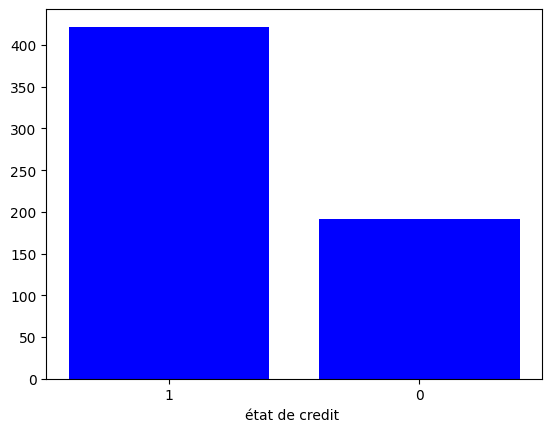

<Figure size 200x200 with 0 Axes>

In [154]:
#visualiser 
cat = ['1' , '0']
val = [422, 192]
plt.bar(cat , val , color='blue')
plt.xlabel( 'état de credit ' )

# Définir la taille de la figure
plt.figure(figsize=(2, 2))
yes  = target.value_counts()[1]/ len(target)
no    = target.value_counts()[0]/ len(target)

print("le pourcentage de credit accorde : " ,yes )
print("le pourcentage de credit non accorde :" ,no )

In [155]:
#la base de donne utiliser pour l exploration 
df= pd.concat([cat_data,  num_data,   target] , axis=1)


In [156]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0,1


In [157]:

# Supprimer les colonnes en double
df = df.loc[:, ~df.columns.duplicated()]


In [158]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x600 with 0 Axes>

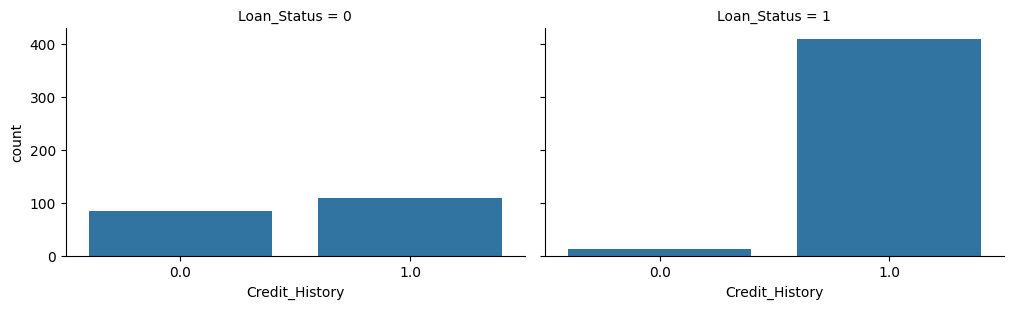

In [159]:
# visualiser la relation entre Credit_History et Loan_Status
# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Créer un FacetGrid avec Seaborn
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)

# Ajouter des countplots au grid
grid.map(sns.countplot, 'Credit_History')



# Afficher le graphique
plt.show()

# Commentaire : on accepte plus souvent les crédits des gens qui ont un historique de crédit


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


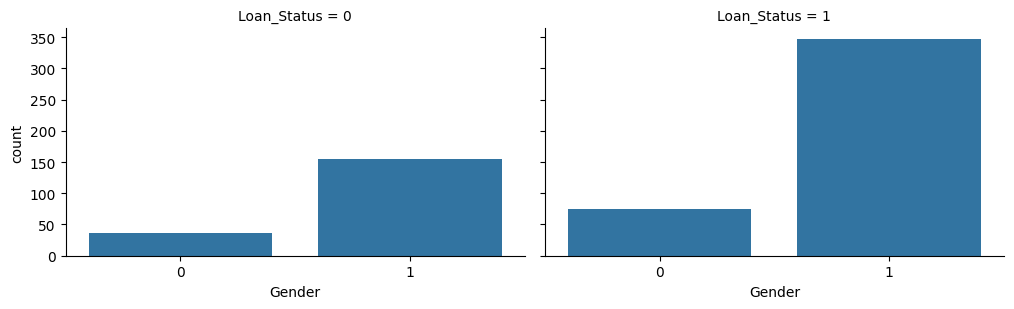

In [160]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

# Commentaire : visualisation des fréquences par sexe en fonction de l'approbation du prêt :les crédits des hommes(1) sont souvent acceptés

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


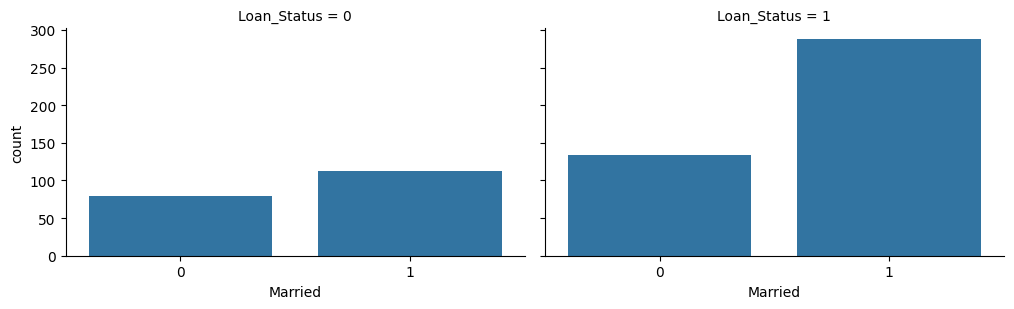

In [161]:
# la distribution de la variable married  en fonction de l'approbation ou du refus du prêt
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


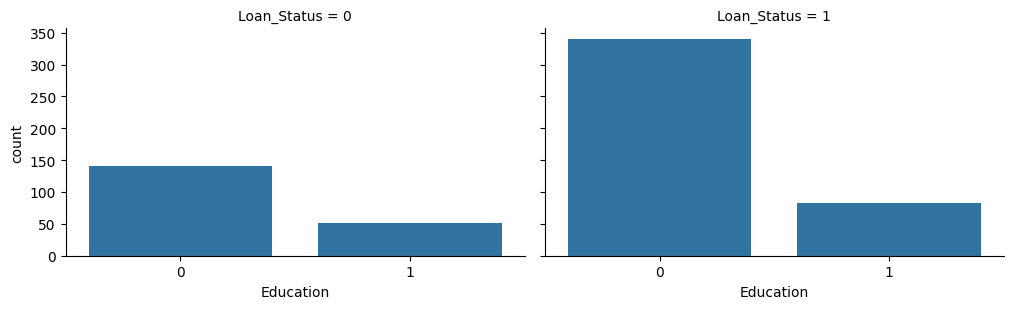

In [162]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)  #0:graduted
grid.map(sns.countplot, 'Education')
#les graduated (0) ont des crédits souvent acceptés 

In [163]:
df.groupby('Loan_Status')['CoapplicantIncome'].median()

Loan_Status
0     268.0
1    1239.5
Name: CoapplicantIncome, dtype: float64

# Modélisation (Modeling)

In [164]:
# StratifiedShuffleSplit :Garantit la conservation des proportions des classes. Idéal pour les données déséquilibrées et les problèmes de classification.
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # un seul split, une taille de test de 20%

# Utilisation de la méthode split pour obtenir les indices d'entraînement et de test
for train_index, test_index in sss.split(x, y):
    # Extraction des données d'entraînement et de test en utilisant les indices
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Affichage des tailles des ensembles d'entraînement et de test
print('Taille de X_train :', x_train.shape)
print('Taille de X_test :', x_test.shape)
print('Taille de y_train :', y_train.shape)
print('Taille de y_test :', y_test.shape)

Taille de X_train : (491, 12)
Taille de X_test : (123, 12)
Taille de y_train : (491,)
Taille de y_test : (123,)


In [165]:
# Définition des modèles
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# Fonction d'application des modèles
def train_test_eval(models, x_train, y_train, x_test, y_test):
    for name, model in models.items():
        model.fit(x_train, y_train)  # Entraînement du modèle
        score = model.score(x_test, y_test)  # Évaluation du modèle
        print(f'{name}: {score:.4f}')
        print("----------")

# Exécution de l'évaluation
train_test_eval(models, x_train, y_train, x_test, y_test)

LogisticRegression: 1.0000
----------
KNeighborsClassifier: 0.6504
----------
DecisionTreeClassifier: 1.0000
----------


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
# on va essayer de prendre qlq colonnes pour notre applicationn :
x2 = x[['Credit_History'  ,'Married','ApplicantIncome' ,]]
x2

,Credit_History,Married,ApplicantIncome
0,1.0,0,5849.0
1,1.0,1,4583.0
2,1.0,1,3000.0
3,1.0,1,2583.0
4,1.0,0,6000.0
...,...,...,...
609,1.0,0,2900.0
610,1.0,1,4106.0
611,1.0,1,8072.0
612,1.0,1,7583.0


In [167]:
# Création d'un objet StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1 , test_size=0.2, random_state=42)# un seul split, une taille de test de 20%,

# Utilisation de la méthode split pour obtenir les indices d'entraînement et de test
for train_index , test_index in sss.split(x2, y):
    
     # Extraction des données d'entraînement et de test en utilisant les indices
     ## Sélection de la première ligne   data.iloc[0]

     # Sélection des trois premières lignes et des deux premières colonnes    data.iloc[0:3, 0:2]

    x_train, x_test = x2.iloc[train_index], x2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Affichage des tailles des ensembles d'entraînement et de test
print('Taille de X_train :', x_train.shape)
print('Taille de X_test :', x_test.shape)
print('Taille de y_train :', y_train.shape)
print('Taille de y_test :', y_test.shape)


Taille de X_train : (491, 3)
Taille de X_test : (123, 3)
Taille de y_train : (491,)
Taille de y_test : (123,)


In [168]:
train_test_eval(models ,   x_train,   y_train,   x_test,y_test)

LogisticRegression: 0.8455
----------
KNeighborsClassifier: 0.6585
----------
DecisionTreeClassifier: 0.8455
----------


In [169]:
Classifier = LogisticRegression()
Classifier.fit(x2,y)

LogisticRegression()

In [170]:
# Sauvegarde du modèle dans un fichier .pkl
pickle.dump(Classifier, open('model.pkl', 'wb'))                         